<a href="https://colab.research.google.com/github/subhadeepk/cse437-assignments/blob/main/lab5_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Value-Function Approximation


## Exercise 1 SGD
Many real-world processes can be modeled as nonlinear relationships, and SGD is a standard tool to fit those models from data.  

**Example: Predicting energy consumption in a building**  
- Energy usage depends on **temperature**, **time of day**, and **occupancy**.  
- If you plot the data, the relationship might not be linear — it curves.  
- A simple way to approximate this nonlinear relation is to fit a **polynomial function** of temperature (or time).  

Now, imagine you’re collecting data continuously:  
- You get one data point (temperature, usage) at a time.  
- Instead of waiting to collect all data and computing a full batch update, you update your model incrementally with **SGD**.  
- This makes your learning **online, adaptive, and scalable** — just like in reinforcement learning.  

---

In this exercise, approximating a cubic polynomial is a simplified version of **predicting a nonlinear real-world phenomenon**.


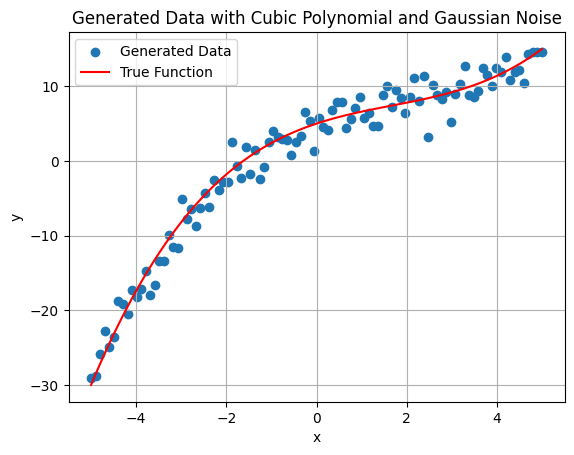

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data based on a cubic polynomial with Gaussian noise
np.random.seed(42)  # for reproducibility
n_samples = 100
x = np.linspace(-5, 5, n_samples)
# Define the true cubic polynomial function
def true_function(x):
  return 0.1 * x**3 - 0.5 * x**2 + 2 * x + 5

y_true = true_function(x)
noise = np.random.normal(0, 2, n_samples)  # Gaussian noise with mean 0 and std dev 2
y = y_true + noise

# Optional: Plot the generated data
plt.scatter(x, y, label='Generated Data')
plt.plot(x, y_true, color='red', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with Cubic Polynomial and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

Based on the given a dataset of input–output pairs `(x, y)` where the underlying relationship is approximately polynomial.  

a. Use a **linear model with polynomial features**: Write a function that takes an input `x` and a weight vector `w`, and return the predicted value y_hat.    
   
   - y_hat(x; w) = w0 + w1 * x + w2 * x^2 + w3 * x^3  

   where w0, w1, w2, w3 are the parameters to be learned.

b. **Loss function (Mean Squared Error)**:
   Write a function that computes the loss for one training point `(x, y)`:

     - Formula: `loss = 0.5 * (y - y_hat)**2`

c. **SGD update**:   Derive the gradient of the loss with respect to each parameter (w0, w1, w2, w3).  
   - Write a function:  

     ```python
     def sgd_update(x, y, w, alpha):
         """
         Perform one SGD update for a single training example.
         Input:
             x (float) - input value
             y (float) - true output
             w (np.array) - current weights
             alpha (float) - learning rate
         Output:
             w (np.array) - updated weights
         """
         # TODO: compute prediction, gradient, and update weights
         return w
     ```
d. **Training loop**:
   - Loop over the dataset.  
   - At each step, update the weights using `sgd_update`.  
   - Track the training loss after each iteration.  

e. **Comparison with different learning rates**  
   - Train your model using at least three different learning rates, for example:  
     - alpha = 0.001  
     - alpha = 0.01  
     - alpha = 0.1  
   - Plot training loss vs iteration for each learning rate.  
   - Plot the final fitted polynomial curves for each learning rate on the same graph with the true dataset.

---

### Deliverables
- Code for `predict`, `mse_loss`, and `sgd_update`.  
- Training loop that runs with multiple learning rates.  
- Plot of training loss vs iteration for each learning rate.  
- Plot of the fitted polynomial vs dataset for each learning rate.  
- A short discussion:
  - How does the learning rate affect convergence speed and stability?  
  - Which learning rate gives the best balance between speed and accuracy?  

/tmp/ipython-input-3698704107.py:8: RuntimeWarning: overflow encountered in scalar power
  return 0.5 * (y - y_hat)**2
/tmp/ipython-input-3698704107.py:36: RuntimeWarning: overflow encountered in square
  epoch_loss.append(np.mean((y - y_hat_all)**2) * 0.5)
/tmp/ipython-input-3698704107.py:13: RuntimeWarning: overflow encountered in multiply
  grad = -(y - y_hat) * phi
/tmp/ipython-input-3698704107.py:14: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * grad


alpha = 0.001 w = [nan nan nan nan]
alpha = 0.0001 w = [ 4.66322748  2.34144132 -0.50514821  0.0656698 ]
alpha = 1e-05 w = [ 4.61043438  2.33968174 -0.48121371  0.07997619]


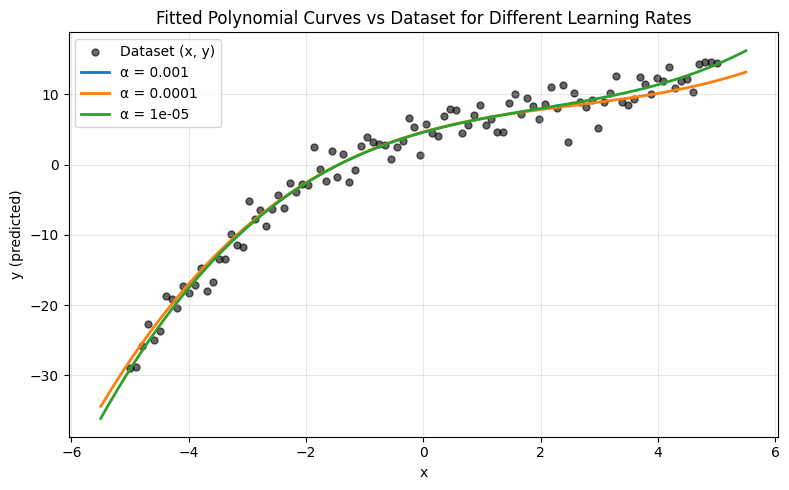

In [2]:
## Your code here

def predict(x: float, w: np.ndarray) -> float:
    return w[0] + w[1]*x + w[2]*(x**2) + w[3]*(x**3)


def mse_loss(y: float, y_hat: float) -> float:
    return 0.5 * (y - y_hat)**2

def sgd_update(x: float, y: float, w: np.ndarray, alpha: float) -> np.ndarray:
    phi = np.array([1.0, x, x**2, x**3], dtype=float)
    y_hat = float(np.dot(w, phi))
    grad = -(y - y_hat) * phi
    w = w - alpha * grad
    return w

def train_sgd(X, y, alpha, epochs=50, shuffle=True, seed=0):

    rng = np.random.default_rng(seed)
    w = np.zeros(4)                   # initialize weights (w0, w1, w2, w3)
    loss_history = []                 # per-sample losses
    epoch_loss = []                   # mean loss per epoch

    for ep in range(epochs):          # loop over epochs
        idx = np.arange(len(X))       # sample indices
        if shuffle:
            rng.shuffle(idx)          # shuffle order of data each epoch

        for i in idx:                 # loop over each (x_i, y_i)
            y_hat_i = predict(X[i], w)              # forward pass
            loss_history.append(mse_loss(y[i], y_hat_i))  # record loss
            w = sgd_update(X[i], y[i], w, alpha)    # SGD weight update

        # evaluate average loss for this epoch
        y_hat_all = np.array([predict(xi, w) for xi in X])
        epoch_loss.append(np.mean((y - y_hat_all)**2) * 0.5)

    print("alpha =", alpha, "w =", w )
    return w #{"w": w, "min_loss": np.min(np.array(loss_history))}#, "loss_history": np.array(loss_history), "epoch_loss": np.array(epoch_loss)}




# Create smooth X grid for plotting fitted curves
xx = np.linspace(np.min(x)-0.5, np.max(x)+0.5, 400)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=25, alpha=0.6, color='black', label='Dataset (x, y)')
learning_rates = [0.001, 0.0001, 0.00001]

# Plot the fitted polynomial for each learning rate
for alpha in learning_rates:
    w = train_sgd(x, y, alpha, epochs=10000)
    yy = w[0] + w[1]*xx + w[2]*xx**2 + w[3]*xx**3
    plt.plot(xx, yy, label=f"α = {alpha}", linewidth=2)

plt.xlabel("x")
plt.ylabel("y (predicted)")
plt.title("Fitted Polynomial Curves vs Dataset for Different Learning Rates")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Exercise 2: 1000-State Random Walk with Semi-Gradient TD(0)

We will study the 1,000-state Random Walk a classic reinforcement learning benchmark from Sutton & Barto.  

- The environment has states numbered **1 to 1000**.  
- There are two **terminal states**:  
  - State `0` on the left (reward = 0)  
  - State `1001` on the right (reward = 1)  
- Each episode starts in the **middle** at state `500`.  
- At each step, the agent moves **left or right with equal probability (0.5 each)**.  
- The episode ends when the agent reaches either terminal.  
- Discount factor: **γ = 1.0** (episodic task).  


### Function Approximation
Instead of storing a separate value for each state, approximate the value function with a **linear function of the state index**: V_hat(s; w0, w1) = w0 + w1 * s



---

## Instructions
1. **Implement the environment**:  
   - You may **use AI tools such as ChatGPT** to generate the environment code (states, transitions, rewards).  
   - Make sure you understand how the environment works.  

2. **Implement the TD(0) update manually**:  
   - Do **not** use AI for this part.  
   - You must write the gradient update equations yourself using the formulas above.  

3. **Train your agent**:  
   - Run several episodes (e.g., 1000 episodes).  
   - Experiment with different step sizes (`alpha`).  

4. **Evaluate**:  
   - Plot the **true value function** `V*(s) = s/1001`.  
   - Plot your **learned approximation line** after training.  
   - Discuss whether the line captures the overall trend of the true values.  

---


## Guidelines on Using AI Tools
- You are encouraged to use AI tools (e.g., ChatGPT, Gemini, Copilot) to **generate helper code**, such as:  
  - Building the random walk environment (`reset`, `step`).  
  - Implementing the feature map φ(s).  
  - Plotting results.  
- However, **do not use AI tools to generate the TD(0) update equation**.  
  - Deriving and implementing the update is the key learning objective of this exercise.  
  - If we find code that uses an AI-generated update without understanding, the score will be zero.  


## Deliverables
- Python code for the environment and the TD(0) algorithm.  
- Plot the **true value function**: For state `s`, the probability of reaching the right terminal is:  
  `V*(s) = s / 1001`
- Plot comparing the true value function and the approximated line.  
- A short discussion:  
  - How does the approximation behave for small vs large states?  
  - How does the learning rate affect convergence?  

---

## Hints
- Normalize states to `[0,1]` before using them in the line approximation to avoid very large values for w1.  
- Start with small step sizes (e.g., 0.001–0.01).  
- The approximation will not be perfect (a line cannot match the true curve), but should capture the increasing trend.  


Training Episodes: 100%|██████████| 1000/1000 [00:04<00:00, 222.63it/s]


MSE: 0.08424986007217013


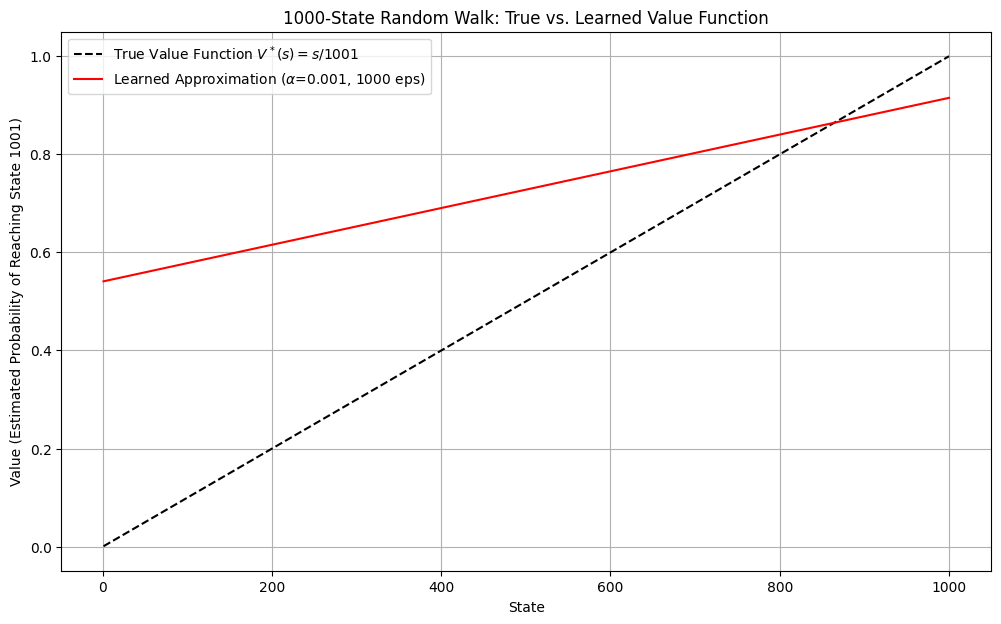

Final Weights: w0 = 0.5402, w1 = 0.3744


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import random

# --- Environment ---
class RandomWalkEnv:
    """
    Implements the 1000-State Random Walk environment.
    """
    def __init__(self):
        self.num_states = 1000
        self.start_state = 500
        self.terminal_left = 0
        self.terminal_right = 1001
        self.current_state = self.start_state

    def reset(self):
        """Resets the environment to the starting state."""
        self.current_state = self.start_state
        return self.current_state

    def step(self):
        """Takes a random step left or right."""
        # Choose action: -1 for left, +1 for right
        old_state = self.current_state
        action = np.random.choice([-100, 100])
        # action = np.random.choice([-1, 1])
        # action = random.randint(-50,50)
        self.current_state += action

        if self.current_state <= self.terminal_left:
            self.current_state = self.terminal_left
            reward = 0
            done = False
        elif self.current_state >= self.terminal_right:
            self.current_state = self.terminal_right
            reward = 1
            done = True
        else:
            reward = 0
            done = False

        return self.current_state, reward, done

# --- Function Approximator ---
class LinearApproximator:
    """
    A linear function approximator for V(s) = w0 + w1*s_norm.
    """
    def __init__(self, feature_dim=2):
        # weights = [w0, w1]
        self.weights = np.zeros(feature_dim)

    def _get_features(self, state):
        """
        Normalizes the state and adds a bias term.
        The feature vector is [1, normalized_state].
        """
        # Normalize state to be in [0, 1] for stability
        normalized_state = state / 1001.0
        return np.array([1.0, normalized_state])

    def predict(self, state):
        """Predicts the value of a state."""
        features = self._get_features(state)
        return np.dot(self.weights, features)

    def update(self, state, target, alpha):
        """
        Updates the weights using the semi-gradient TD(0) rule.
        w <- w + alpha * (target - V_hat(s; w)) * grad(V_hat(s; w))
        """
        prediction = self.predict(state)
        td_error = target - prediction

        # The gradient of V_hat w.r.t w is just the feature vector
        gradient = self._get_features(state)

        # Perform the weight update
        self.weights += alpha * td_error * gradient

# --- Training Loop ---
def train(env, approximator, num_episodes, alpha, gamma=1.0):
    """
    Trains the agent using semi-gradient TD(0).
    """
    for episode in tqdm.trange(num_episodes, desc="Training Episodes"):
        state = env.reset()
        done = False

        while not done:
            next_state, reward, done = env.step()

            # Calculate the TD target
            if done:
                td_target = reward
            else:
                # Target = R + gamma * V_hat(S')
                td_target = reward + gamma * approximator.predict(next_state)

            # Update the approximator's weights
            approximator.update(state, td_target, alpha)

            # Move to the next state
            state = next_state

def calculate_mse(actual_values, predicted_values):
    """
    Calculates the Mean Squared Error (MSE) between actual and predicted values.

    Args:
        actual_values (np.array or list): The true, observed values.
        predicted_values (np.array or list): The values predicted by a model.

    Returns:
        float: The Mean Squared Error.
    """
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Calculate the squared differences
    squared_errors = np.square(actual_values - predicted_values)

    # Calculate the mean of the squared errors
    mse = np.mean(squared_errors)
    return mse

# --- Main Execution and Plotting ---
if __name__ == '__main__':
    # Hyperparameters
    NUM_EPISODES = 1000
    ALPHA = 0.001 # A good starting step-size

    # Initialization
    env = RandomWalkEnv()
    approximator = LinearApproximator()

    # Train the agent
    train(env, approximator, num_episodes=NUM_EPISODES, alpha=ALPHA)

    # --- Evaluation and Plotting ---
    states = np.arange(1, 1001)

    # Calculate true values
    true_values = states / 1001.0

    # Get learned values from the approximator
    learned_values = [approximator.predict(s) for s in states]
    print(f"MSE: {calculate_mse(true_values, learned_values)}")

    # Plotting the results
    plt.figure(figsize=(12, 7))
    plt.plot(states, true_values, label='True Value Function $V^*(s) = s/1001$', color='black', linestyle='--')
    plt.plot(states, learned_values, label=f'Learned Approximation ($\\alpha$={ALPHA}, {NUM_EPISODES} eps)', color='red')

    plt.title('1000-State Random Walk: True vs. Learned Value Function')
    plt.xlabel('State')
    plt.ylabel('Value (Estimated Probability of Reaching State 1001)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Final Weights: w0 = {approximator.weights[0]:.4f}, w1 = {approximator.weights[1]:.4f}")

# Exercise 3: Solving MountainCar with Tile Coding and SARSA

## Problem Description
In this exercise, you will solve the **MountainCar-v0** environment from Gym using **tile coding** for function approximation and the **SARSA algorithm** for learning.  

The **Mountain Car problem**:
- A car is stuck in a valley and is too weak to drive straight up to the goal.  
- It must build momentum by going back and forth until it can reach the goal at `position >= 0.5`.  
- **State space**: continuous (position, velocity).  
- **Actions**: {0: push left, 1: no push, 2: push right}.  
- **Reward**: -1 per step until the goal is reached.  
- **Episode ends**: when the car reaches the goal or after 200 steps.  

---

## Step 1: Environment and Random Policy (with AI help)
- Use an **AI tool (e.g., ChatGPT)** to generate starter code for:
  - Creating the Gym environment (`MountainCar-v0`).  
  - Running a **random policy** (actions chosen randomly).  
- Run this code to confirm you can interact with the environment and see episode returns.  
- This will serve as a **baseline**.  
- **Important**: Do not use AI to implement the learning algorithm.  

---

## Step 2: SARSA Algorithm with Function Approximation
Implement **SARSA (on-policy TD control)** with the following steps:

For each episode:
1. Initialize state `s`.  
2. Choose action `a` using **ε-greedy** based on Q(s,a).  
3. For each step:  
   - Take action `a`, observe `(s_next, r, done)`.  
   - Choose next action `a_next` using ε-greedy from `s_next`.  
   - Compute TD target:  
     ```
     target = r + gamma * Q(s_next, a_next)
     ```  
     (if `s_next` is terminal, then target = r).  
   - Compute TD error:  
     ```
     delta = target - Q(s,a)
     ```  
   - Update weights:  
     ```
     w <- w + alpha * delta * x(s,a)
     ```  
   - Update `s = s_next`, `a = a_next`.  
4. End episode when the goal is reached or step limit is hit.  

---

## Step 3: Experiments
- Train the agent for 500–1000 episodes.  
- Plot **episode returns (sum of rewards)** vs episodes.  
- Compare with the random policy baseline:  
  - Does SARSA learn to consistently reach the goal?  
  - How many steps does it typically take?  

---

## Deliverables
- Python code for tile coding and SARSA.  
- Plot of returns vs episodes.  
- Plot the Value function
- Short discussion (1–2 paragraphs):  
  - Effect of tile coding parameters (number of tilings, resolution).


In [37]:
"""
Tile Coding Software version 3.0beta
by Rich Sutton
based on a program created by Steph Schaeffer and others
External documentation and recommendations on the use of this code is available in the
reinforcement learning textbook by Sutton and Barto, and on the web.
These need to be understood before this code is.

This software is for Python 3 or more.

This is an implementation of grid-style tile codings, based originally on
the UNH CMAC code (see http://www.ece.unh.edu/robots/cmac.htm), but by now highly changed.
Here we provide a function, "tiles", that maps floating and integer
variables to a list of tiles, and a second function "tiles-wrap" that does the same while
wrapping some floats to provided widths (the lower wrap value is always 0).

The float variables will be gridded at unit intervals, so generalization
will be by approximately 1 in each direction, and any scaling will have
to be done externally before calling tiles.

Num-tilings should be a power of 2, e.g., 16. To make the offsetting work properly, it should
also be greater than or equal to four times the number of floats.

The first argument is either an index hash table of a given size (created by (make-iht size)),
an integer "size" (range of the indices from 0), or nil (for testing, indicating that the tile
coordinates are to be returned without being converted to indices).
"""

basehash = hash

class IHT:
    "Structure to handle collisions"
    def __init__(self, sizeval):
        self.size = sizeval
        self.overfullCount = 0
        self.dictionary = {}

    def __str__(self):
        "Prepares a string for printing whenever this object is printed"
        return "Collision table:" + \
               " size:" + str(self.size) + \
               " overfullCount:" + str(self.overfullCount) + \
               " dictionary:" + str(len(self.dictionary)) + " items"

    def count (self):
        return len(self.dictionary)

    def fullp (self):
        return len(self.dictionary) >= self.size

    def getindex (self, obj, readonly=False):
        d = self.dictionary
        if obj in d: return d[obj]
        elif readonly: return None
        size = self.size
        count = self.count()
        if count >= size:
            if self.overfullCount==0: print('IHT full, starting to allow collisions')
            self.overfullCount += 1
            return basehash(obj) % self.size
        else:
            d[obj] = count
            return count

def hashcoords(coordinates, m, readonly=False):
    if type(m)==IHT: return m.getindex(tuple(coordinates), readonly)
    if type(m)==int: return basehash(tuple(coordinates)) % m
    if m==None: return coordinates

from math import floor, log
from itertools import zip_longest

def tiles (ihtORsize, numtilings, floats, ints=[], readonly=False):
    """returns num-tilings tile indices corresponding to the floats and ints"""
    qfloats = [floor(f*numtilings) for f in floats]
    Tiles = []
    for tiling in range(numtilings):
        tilingX2 = tiling*2
        coords = [tiling]
        b = tiling
        for q in qfloats:
            coords.append( (q + b) // numtilings )
            b += tilingX2
        coords.extend(ints)
        Tiles.append(hashcoords(coords, ihtORsize, readonly))
    return Tiles

def tileswrap (ihtORsize, numtilings, floats, wrapwidths, ints=[], readonly=False):
    """returns num-tilings tile indices corresponding to the floats and ints, wrapping some floats"""
    qfloats = [floor(f*numtilings) for f in floats]
    Tiles = []
    for tiling in range(numtilings):
        tilingX2 = tiling*2
        coords = [tiling]
        b = tiling
        for q, width in zip_longest(qfloats, wrapwidths):
            c = (q + b%numtilings) // numtilings
            coords.append(c%width if width else c)
            b += tilingX2
        coords.extend(ints)
        Tiles.append(hashcoords(coords, ihtORsize, readonly))
    return Tiles

In [38]:
import gymnasium as gym
import random
import matplotlib.pyplot as plt
import numpy as np

global iht
iht = IHT(2048)


def update_w(episode, gamma, alpha, sarsa_n, w): #updates the Q[state][action] function at the end of each episode

    episode_length = len(episode)

    if episode_length<sarsa_n:
        return w

    # sarsa_n+=1

    current_position = episode[-1][0]
    current_velocity = episode[-1][1]
    current_action = episode[-1][2]
    current_state = get_active_tiles(iht, current_position, current_velocity)

    # # Max Q value at that particular state, irrespective of which action is actually taken
    # accumulated_return = max(Q[current_state])

    # for n-step sarsa
    accumulated_return = max(max(Q(current_state, w)))


    # Finds accumulated return for sarsa_n != INF, basically bootstrapping:: sarsa_n very big for MC
    for time in range(episode_length-2 ,episode_length - sarsa_n -2, -1):

        state = get_active_tiles(iht, episode[time][0],episode[time][1])
        action = int(episode[time][2])
        reward = episode[time][3]
        accumulated_return *= gamma
        G = reward + accumulated_return
        # print("Update Q", state, action, Q[state][action])


    #updating value of w
    # print(G - Q(state, w, action))
    w[action,:][state] += alpha * (G - Q(state, w, action))
    return w

def get_active_tiles(iht, position, velocity, pos_min = -1.2, pos_max = 0.6, vel_min = -0.07 , vel_max = 0.07, num_tiles = 8, num_tilings = 8):

    def tiles (ihtORsize, numtilings, floats, ints=[], readonly=False):
      """returns num-tilings tile indices corresponding to the floats and ints"""
      qfloats = [floor(f*numtilings) for f in floats]
      Tiles = []
      for tiling in range(numtilings):
          tilingX2 = tiling*2
          coords = [tiling]
          b = tiling
          for q in qfloats:
              coords.append( (q + b) // numtilings )
              b += tilingX2
          coords.extend(ints)
          Tiles.append(hashcoords(coords, ihtORsize, readonly))
      return Tiles

      pos_scale = num_tiles / (pos_max - pos_min)
      vel_scale = num_tiles / (vel_max - vel_min)
      scaled_pos = position* pos_scale
      scaled_vel = velocity*vel_scale
      tiles = tiles(iht, num_tilings, [scaled_pos,scaled_vel])

      return tiles

def Q(state, w, action=5):
    action = int(action)
    if action!=5:
        res = np.sum(w[action,:][state])
        return res
    else:
        all_action_qual = np.array([[np.sum(w[0,:][state]),np.sum(w[1,:][state]),np.sum(w[2,:][state])]])
        return all_action_qual


# --------------Environment parameters-------------------------------
env = gym.make('MountainCar-v0')

#---------------------Learning parameters---------------------------------------
# Generate 500 episode, 500 max steps for each episode
Learning_steps = 600 #Number of episodes
Planning_steps = 0
MAX_STEPS = 1000
Epsilon = 0.1  #for epsilon greedy policy: Chooses random action with epsilon probability
gamma = 0.95    #  discount factor
alpha = 0.05  #  step size
sarsa_n = 1
no_of_tiles = 8
num_actions = 3

# There are 8 tilings with 8 tiles on each axes, so the maximum index returned by tiling can be 8*8 = 64

w = np.zeros((num_actions, 2048)) #initializing the weight matrix

episode_rewards = []



for i in range (0,Learning_steps):

    if i>Learning_steps-50:
        env = gym.make("MountainCar-v0", render_mode=None, goal_velocity=0)  # default goal_velocity=0
        epsilon = 0
    else:
        env = gym.make("MountainCar-v0", render_mode=None, goal_velocity=0)  # default goal_velocity=0
        epsilon = 1 - i/Learning_steps




    episode = []
    obs = env.reset(seed=123, options={"x_init": np.pi/2, "y_init": 0.5})
    obs, reward, done, _, info = env.step(1)
    done = False
    reward_in_ep = 0

    # print("Episode number", i+1)

    for steps_in_episode in range(MAX_STEPS):
        if done:
            break

        state = get_active_tiles(iht, obs[0], obs[1])
        action_vals = Q(state,w)
        action = np.argmax(action_vals)

        obs, reward, done, _, info = env.step(action)
        episode.append([obs[0], obs[1], action, reward])
        update_w(episode, gamma, alpha, sarsa_n, w)
        reward_in_ep += reward


    episode_rewards.append(reward_in_ep)


window_size = 10
moving_avg = np.convolve(episode_rewards, np.ones(window_size)/window_size, mode='valid')
maximum_reward = np.max(episode_rewards)

plt.figure(figsize=(12, 6))
plt.plot(moving_avg, label=f"SARSA {sarsa_n} step")
plt.xlabel("Episode")
plt.ylabel("Avg Return")
plt.title(f"Avg SARSA {sarsa_n} Returns per Episode, max reward = {maximum_reward}")
plt.legend()
plt.grid(True)
plt.show()

env.close()




UnboundLocalError: cannot access local variable 'tiles' where it is not associated with a value